<a href="https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/2_3_Coding_the_Illiac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding the Illiac
OK, now let's code the actual *Illiac Suite* with the rules Hiller and Issacson used.

## Setup
This time we'll need to import our music libraries.

In [0]:
# install external libraries
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [0]:
# imports
import mai
import random

Using TensorFlow backend.


# Rules

## First, no rules
Just to hear what a random melody sounds like...

In [0]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 108
  new_note = random.randint(0,108)
  
  # append new_note to the melody
  my_melody += [new_note]
    
# print the random melody
print(my_melody)

[119, 107, 86, 79, 87, 7, 105, 63, 90, 86, 1, 19]


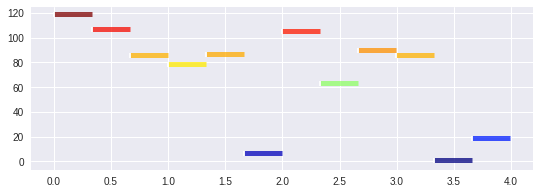

In [0]:
# let's see it
mai.make_music_plot(my_melody)

In [0]:
# let's hear it
mai.make_music(my_melody, pgm=1)

## Rule 1: the octave rule
"No melodic line may span more than an octave."


In [0]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 108
  new_note = random.randint(0,108)
  
  # the octave rule
  rule = max(my_melody + [new_note]) - min(my_melody + [new_note]) <= 12
         
  # if we pass the rule, append new_note to the melody
  if rule:
    my_melody += [new_note]
    
# print the random melody
print(my_melody)

[91, 98, 101, 90, 94, 102, 96, 102, 102, 101, 98, 95]


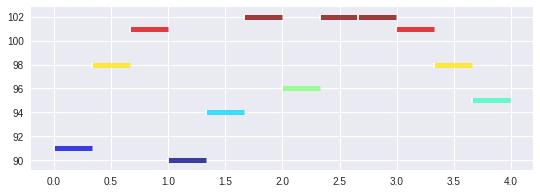

In [0]:
# let's see it
mai.make_music_plot(my_melody)

In [0]:
# let's hear it
mai.make_music(my_melody, pgm=1)

## Rule 4: no skips of a major or minor seventh
"A melodic skip of a major or minor seventh  is forbidden  because this is a dissonant melodic interval."

In [0]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 108
  new_note = random.randint(0,108)
  
  # no skips of a major or minor seventh
  rule = len(my_melody) < 1 or abs(new_note - my_melody[-1]) != 11 and abs(new_note - my_melody[-1]) != 10
         
  # if we pass the rule, append new_note to the melody
  if rule:
    my_melody += [new_note]
    
# print the random melody
print(my_melody)

[45, 14, 17, 46, 127, 40, 22, 30, 32, 80, 73, 6]


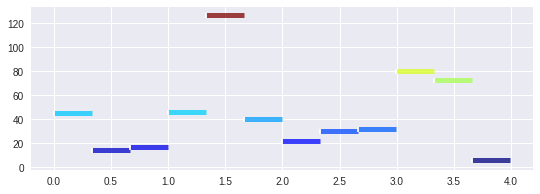

In [0]:
# let's see it
mai.make_music_plot(my_melody)

In [0]:
# let's hear it
mai.make_music(my_melody, pgm=1)

## Rule 5: a skip must be followed by stepwise motion
"Any melodic skip, i.e., a melodic movement  of a minor third or more, must be followed by a tone repeat or by a stepwise motion with or without a change in direction. A stepwise motion is a minor or major second."

In [0]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 108
  new_note = random.randint(0,108)
  
  # a skip must be followed by stepwise motion
  rule = len(my_melody) < 2 or abs(my_melody[-1] - my_melody[-2]) < 3 or abs(new_note - my_melody[-1]) <= 2 
         
  # if we pass the rule, append new_note to the melody
  if rule:
    my_melody += [new_note]
    
# print the random melody
print(my_melody)

[69, 70, 86, 86, 13, 12, 62, 63, 12, 11, 127, 127]


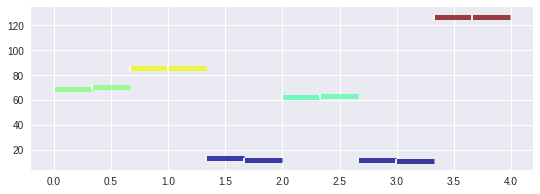

In [0]:
# let's see it
mai.make_music_plot(my_melody)

In [0]:
# let's hear it
mai.make_music(my_melody, pgm=1)

## Rule 6: no more than one successive repeat of a given note
"No more than one successive repeat of a given note is permitted."

In [0]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 108
  new_note = random.randint(0,108)
  
  # no more than one successive repeat of a given note
  rule = len(my_melody) < 2 or not (new_note == my_melody[-2] == my_melody[-1])
         
  # if we pass the rule, append new_note to the melody
  if rule:
    my_melody += [new_note]
    
# print the random melody
print(my_melody)

[108, 112, 72, 3, 14, 37, 94, 80, 63, 9, 52, 95]


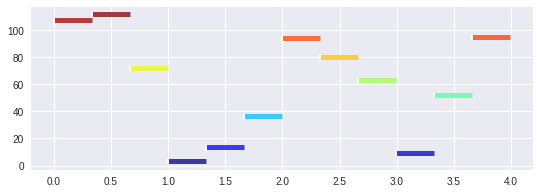

In [0]:
# let's see it
mai.make_music_plot(my_melody)

In [0]:
# let's hear it
mai.make_music(my_melody, pgm=1)

# Now let's make some music... All of the rules

In [0]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 108
  new_note = random.randint(0,108)
  
  # the octave rule
  rule1 = max(my_melody + [new_note]) - min(my_melody + [new_note]) <= 12
  
  # no skips of a major or minor seventh
  rule4 = len(my_melody) < 1 or abs(new_note - my_melody[-1]) != 11 and abs(new_note - my_melody[-1]) != 10

  # a skip must be followed by stepwise motion
  rule5 = len(my_melody) < 2 or abs(my_melody[-1] - my_melody[-2]) < 3 or abs(new_note - my_melody[-1]) <= 2 
         
  # no more than one successive repeat of a given note
  rule6 = len(my_melody) < 2 or not (new_note == my_melody[-2] == my_melody[-1])
       
  # does it pass ALL of the rules? append new_note to the melody
  if rule1 and rule4 and rule5 and rule6:
    my_melody += [new_note]
    
# print the random melody
print(my_melody)

[103, 94, 96, 95, 101, 103, 91, 91, 99, 99, 91, 92]


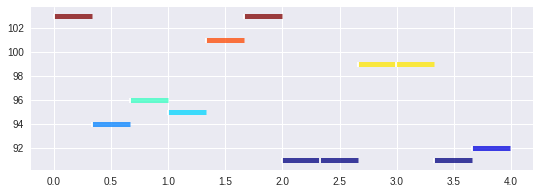

In [0]:
# let's see it
mai.make_music_plot(my_melody)

In [0]:
# let's hear it
mai.make_music(my_melody, pgm=1)

# Preview of coming attractions: backtracking
Here we add one final rule to force the melody to end on the same note that it starts on. Rather than writing a function to describe the rule, I code it directly into the while loop. IMPORTANT: this cell may cause an infinite loop. WHY? The way to avoid this problem is called "backtracking," and we'll talk more about it next week.

REMEMBER: force quit the cell by clicking the stop button in the upper left.

In [0]:
# initialize the melody to an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 12:
  
  # generate a random note between 0 and 108
  new_note = random.randint(0,108)
  
  # if it is the last pitch 
  if len(my_melody) == 12 - 1:

    # end on the first note
    new_note = my_melody[0]
  
  # the octave rule
  rule1 = max(my_melody + [new_note]) - min(my_melody + [new_note]) <= 12
  
  # no skips of a major or minor seventh
  rule4 = len(my_melody) < 1 or abs(new_note - my_melody[-1]) != 11 and abs(new_note - my_melody[-1]) != 10

  # a skip must be followed by stepwise motion
  rule5 = len(my_melody) < 2 or abs(my_melody[-1] - my_melody[-2]) < 3 or abs(new_note - my_melody[-1]) <= 2 
         
  # no more than one successive repeat of a given note
  rule6 = len(my_melody) < 2 or not (new_note == my_melody[-2] == my_melody[-1])
       
  # does it pass ALL of the rules? append new_note to the melody
  if rule1 and rule4 and rule5 and rule6:
    my_melody += [new_note]
    
# print the random melody
print(my_melody)

KeyboardInterrupt: ignored

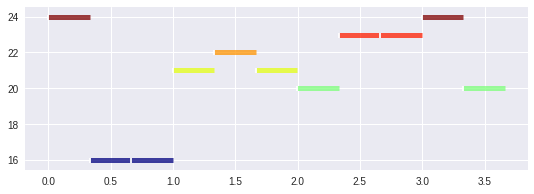

In [0]:
# let's see it
mai.make_music_plot(my_melody)

In [0]:
# let's hear it
mai.make_music(my_melody, pgm=1)